The following notebook will take in a sample dataset, perform exploratory data analysis, and build a machine learning model for you. All you are expected to do is to run this Interactive Jupyter Notebook once. Your task is to build a web based application using web frameworks that are commonly used to deploy machine learning models to the web. Using MERN stack for creating and maintaining the webapp will positively affect the evaluation process of your application although it is not mandatory for you to be considered. You are expected to created a webapp that will display the various plots generated during the EDA and also add functionality for a UI that will allow users to enter the information directly onto the webapp so that the developed machine learning model can be used to make predictions on unseen data.
You have complete creative license to develop the application as you please because we are interested more about how you choose to approach the various challenges one may face during developing such an application. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [42]:
df['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age']= df['Age'].fillna(df['Age'].mean())

In [6]:
df.dropna(subset=['Embarked'],inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
print(df.describe())
print(df.shape)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   29.653446    0.524184   
std     256.998173    0.486260    0.834700   12.968366    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.000000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  889.000000  889.000000  
mean     0.382452   32.096681  
std      0.806761   49.697504  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(889, 12)


In [8]:
print("The number of columns present is as follows",df.columns.value_counts().sum())
print("The columns present in the actual dataset is as follows", df.columns.tolist())
cols = df.columns.tolist()

The number of columns present is as follows 12
The columns present in the actual dataset is as follows ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [9]:
print("Visualising the dtypes",df.dtypes)
num_cols = df.select_dtypes([np.int64,np.float64]).columns.tolist()
num_cols.remove('PassengerId')
print(num_cols)

Visualising the dtypes PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


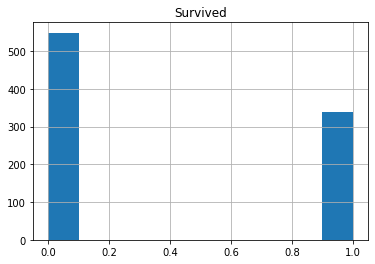

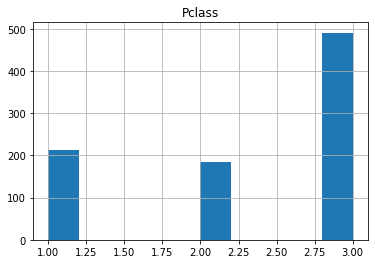

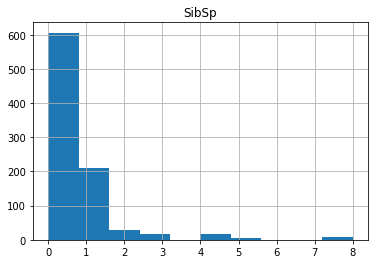

In [10]:
#Generating Histograms for numeric columns
for col in num_cols:
    df.hist(column=col)

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>],
       [<A

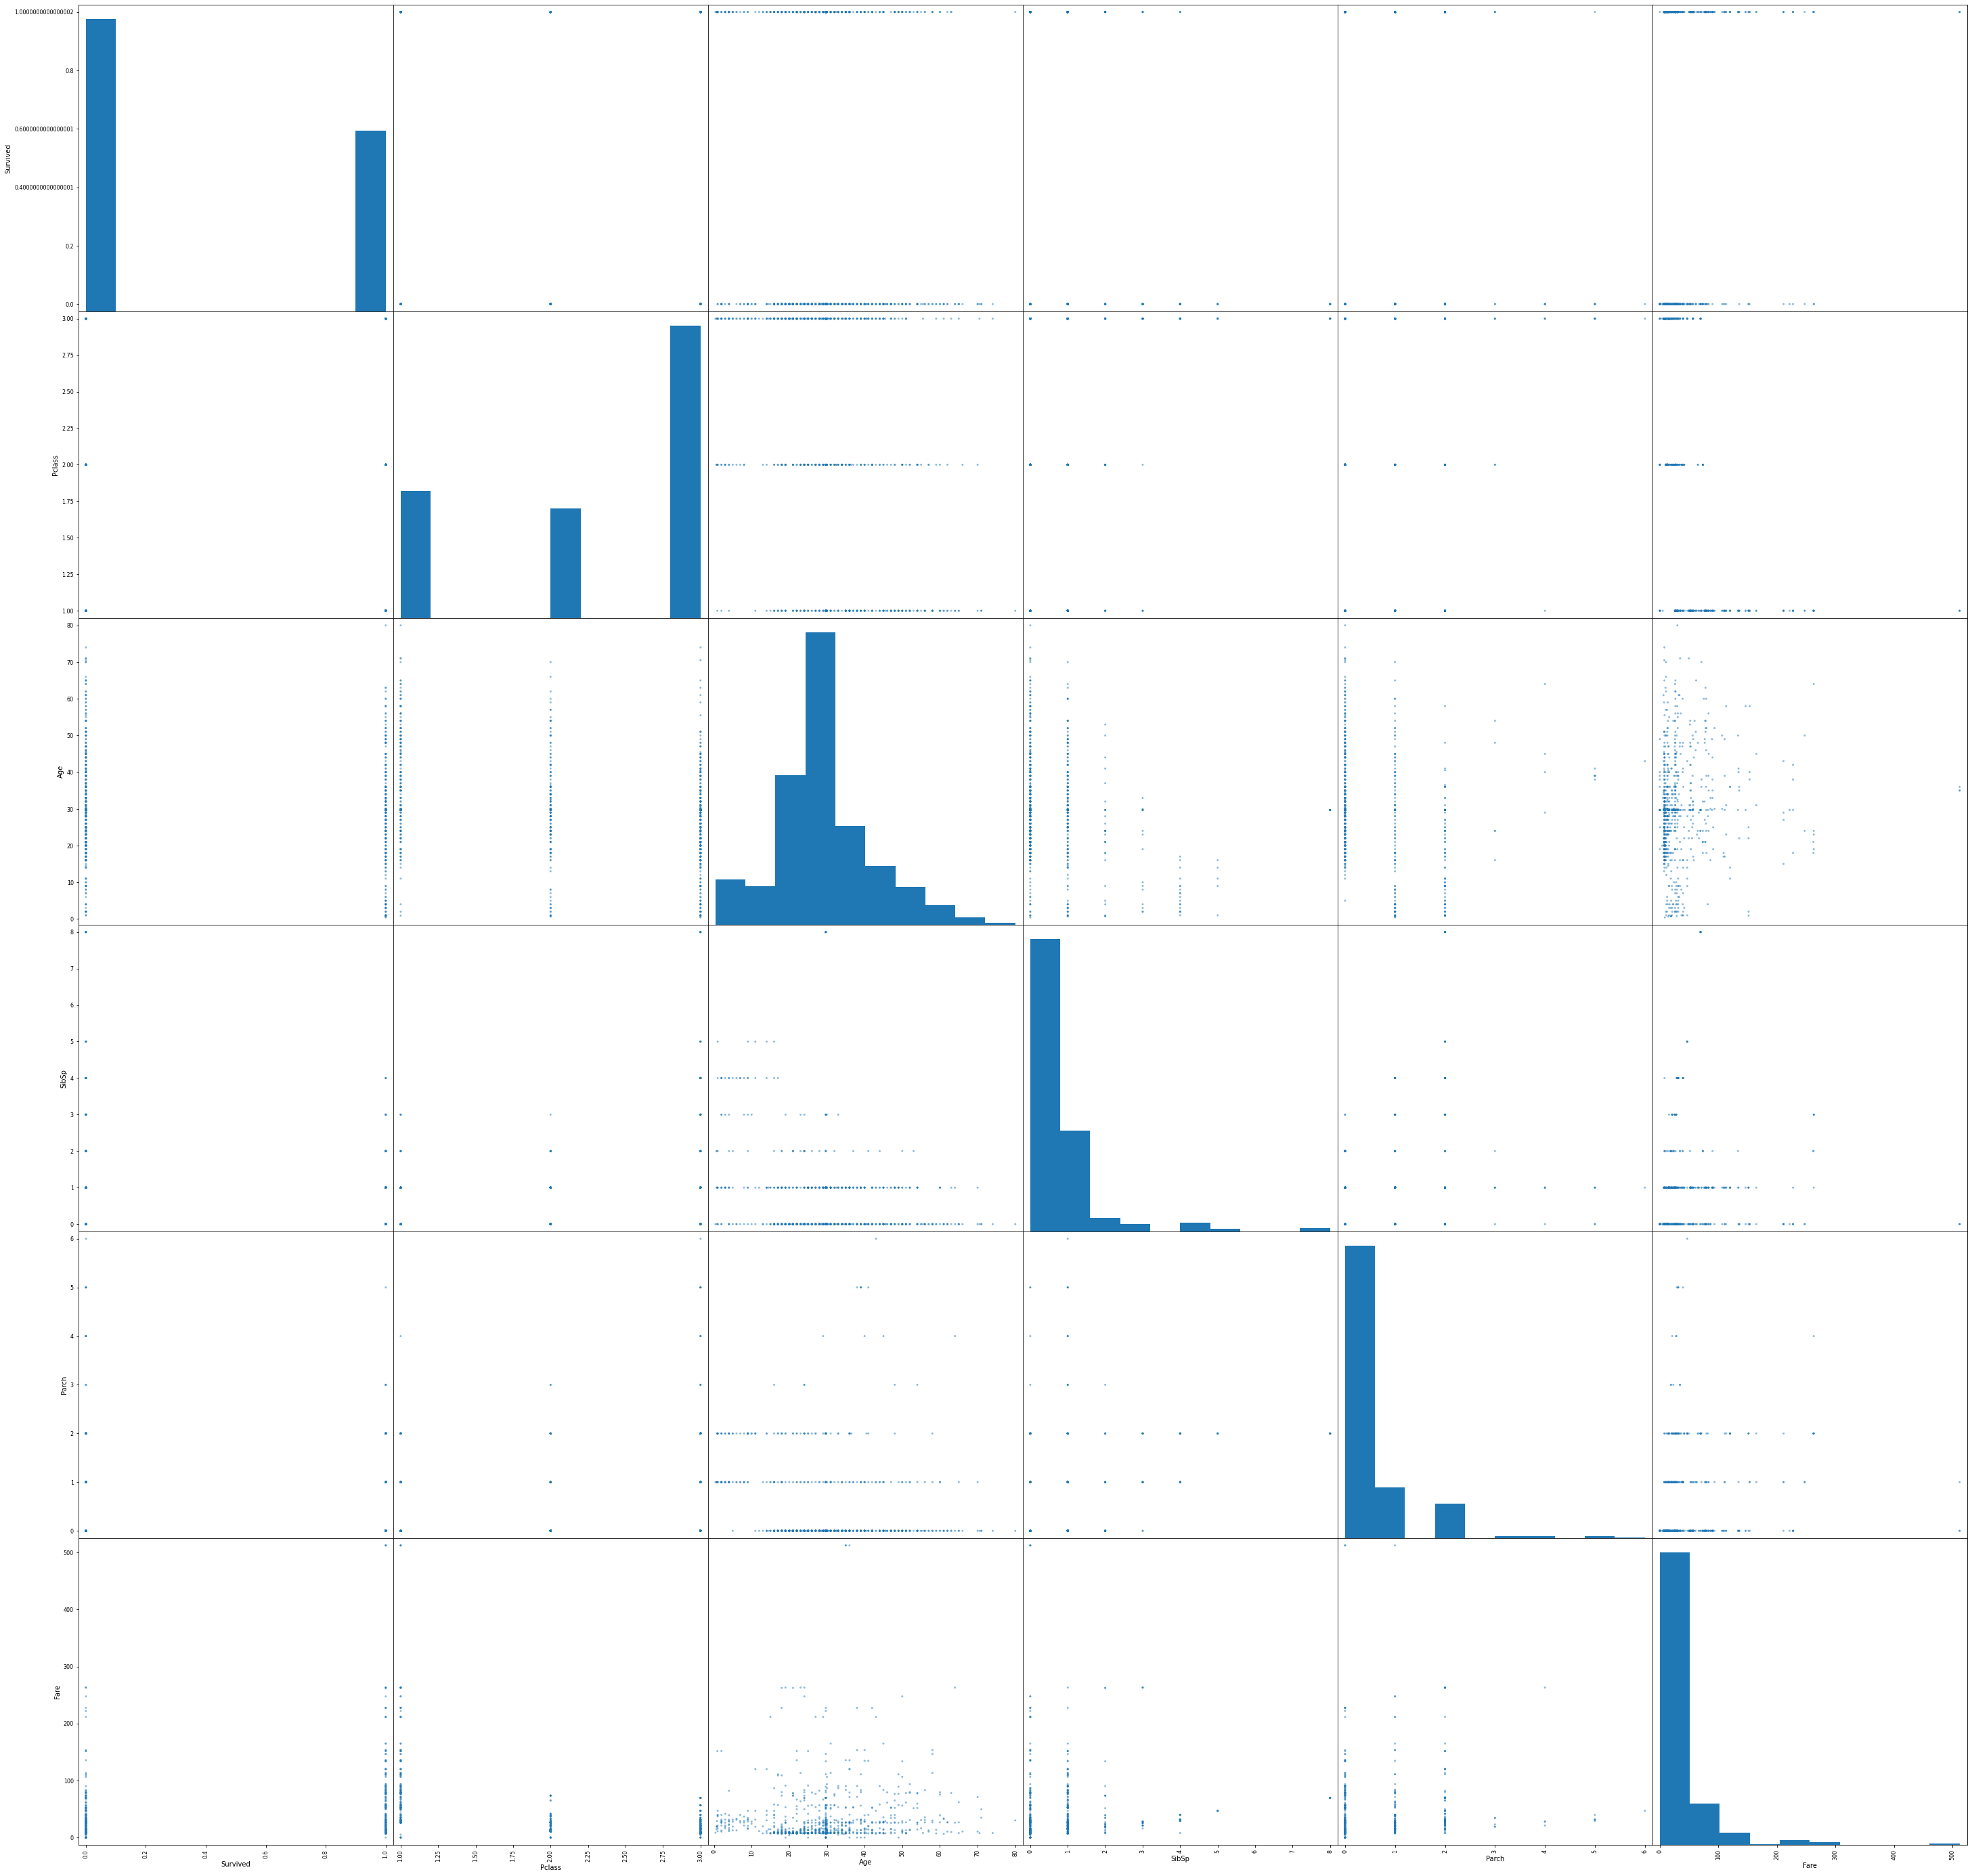

In [11]:
#Studying the correlation of the columns using scatter plots
from pandas.plotting import scatter_matrix

scatter_matrix(df[num_cols],figsize=(50,50))

In [12]:
obj_cols = df.select_dtypes([np.object]).columns.tolist()
# obj_cols.remove('Name')
# obj_cols.remove('Cabin')
# obj_cols.remove('Ticket')
# print(obj_cols)

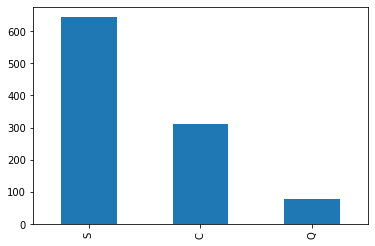

In [13]:
#Plotting categorical data against frequency
for col in obj_cols:
    df[col].value_counts().plot(kind='bar')

In [14]:
y = pd.Series(df['Survived'])
drop_list = ['Survived','Name','Ticket','Cabin']
X = df.drop(drop_list,axis=1)

In [15]:
import category_encoders as ce
encoder=ce.OneHotEncoder(handle_unknown='return_nan',return_df=True,use_cat_names=True)
X = encoder.fit_transform(X)
X

PassengerId  Pclass  Sex_male  Sex_female        Age  SibSp  Parch  \
0              1       3       1.0         0.0  22.000000      1      0   
1              2       1       0.0         1.0  38.000000      1      0   
2              3       3       0.0         1.0  26.000000      0      0   
3              4       1       0.0         1.0  35.000000      1      0   
4              5       3       1.0         0.0  35.000000      0      0   
..           ...     ...       ...         ...        ...    ...    ...   
886          887       2       1.0         0.0  27.000000      0      0   
887          888       1       0.0         1.0  19.000000      0      0   
888          889       3       0.0         1.0  29.699118      1      2   
889          890       1       1.0         0.0  26.000000      0      0   
890          891       3       1.0         0.0  32.000000      0      0   

        Fare  Embarked_S  Embarked_C  Embarked_Q  
0     7.2500         1.0         0.0         0.0  
1    71.2833         0.0         1.0         0.0  
2     7.9250         1.0         0.0         0.0  
3    53.1000         1.0         0.0         0.0  
4     8.0500         1.0         0.0         0.0  
..       ...         ...         ...         ...  
886  13.0000         1.0         0.0         0.0  
887  30.0000         1.0         0.0         0.0  
888  23.4500         1.0         0.0         0.0  
889  30.0000         0.0         1.0         0.0  
890   7.7500         0.0         0.0         1.0  

[889 rows x 11 columns]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [18]:
X_train

PassengerId  Pclass  Sex_male  Sex_female        Age  SibSp  Parch  \
621          622       1       1.0         0.0  42.000000      1      0   
481          482       2       1.0         0.0  29.699118      0      0   
527          528       1       1.0         0.0  29.699118      0      0   
435          436       1       0.0         1.0  14.000000      1      2   
797          798       3       0.0         1.0  31.000000      0      0   
..           ...     ...       ...         ...        ...    ...    ...   
359          360       3       0.0         1.0  29.699118      0      0   
643          644       3       1.0         0.0  29.699118      0      0   
736          737       3       0.0         1.0  48.000000      1      3   
462          463       1       1.0         0.0  47.000000      0      0   
507          508       1       1.0         0.0  29.699118      0      0   

         Fare  Embarked_S  Embarked_C  Embarked_Q  
621   52.5542         1.0         0.0         0.0  
481    0.0000         1.0         0.0         0.0  
527  221.7792         1.0         0.0         0.0  
435  120.0000         1.0         0.0         0.0  
797    8.6833         1.0         0.0         0.0  
..        ...         ...         ...         ...  
359    7.8792         0.0         0.0         1.0  
643   56.4958         1.0         0.0         0.0  
736   34.3750         1.0         0.0         0.0  
462   38.5000         1.0         0.0         0.0  
507   26.5500         1.0         0.0         0.0  

[711 rows x 11 columns]

In [19]:
X_train.dtypes

PassengerId      int64
Pclass           int64
Sex_male       float64
Sex_female     float64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_S     float64
Embarked_C     float64
Embarked_Q     float64
dtype: object

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [21]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

train_preds = model.predict(X_train)
print("Training scores are as follows")
print("Accuracy Score",accuracy_score(train_preds,y_train))
print("F1 Score",f1_score(train_preds,y_train))
print("ROC AUC Score",roc_auc_score(train_preds,y_train))


test_preds = model.predict(X_test)
print("Testing scores are as follows")
print("Accuracy Score",accuracy_score(test_preds,y_test))
print("F1 Score",f1_score(test_preds,y_test))
print("ROC AUC Score",roc_auc_score(test_preds,y_test))

Training scores are as follows
Accuracy Score 1.0
F1 Score 1.0
ROC AUC Score 1.0
Testing scores are as follows
Accuracy Score 0.8089887640449438
F1 Score 0.7343749999999999
ROC AUC Score 0.802683615819209


In [22]:
import joblib

In [23]:
joblib.dump(model,"model_joblib")

['model_joblib']

In [24]:
#Testing
loaded_model = joblib.load("model_joblib")
array = [5,3,1.0,0.0,35.0,0,0,8.0500,1.0,0.0,0.0] 
#each value represents a feature present in the training set Hint: the users should be able to enter their own values/(or) select from a drop down list of values to make custom predictions
a = np.asarray(array).reshape(1,-1)
predicted_value= loaded_model.predict(a)

In [25]:
actual_value = y[4]
print("Actual Value",actual_value)
print("Predicted Value",predicted_value)

Actual Value 0
Predicted Value [0]


In [26]:
y[4]

0

In [27]:
# Should fail
loaded_model.predict(np.asarray([5,'',1.0,0.0,35.0,0,0,8.0500,1.0,0.0,0.0]).reshape(1, -1))

ValueError: could not convert string to float: ''